In [253]:
"""
<<수정사항>>
1. class 객체의 주소 활용
2. visited, prev, distance도 class로 부여
   - bi-dijkstra에서는 visited를 list로 만드는게 좋지 않을까 생각...
3.Dijkstra with priority queue

4.Bi-dijsktra 문제해결
   - bi-priority queue를 사용했을때, adjacent node 탐색 후 비교

Grid figure 만들기

** execution time 측정

"""

'\n<<수정사항>>\n1. class 객체의 주소 활용\n2. visited, prev, distance도 class로 부여\n   - bi-dijkstra에서는 visited를 list로 만드는게 좋지 않을까 생각...\n3.Dijkstra with priority queue\n\n4.Bi-dijsktra 문제해결\n   - bi-priority queue를 사용했을때, adjacent node 탐색 후 비교\n\nGrid figure 만들기\n\n** execution time 측정\n\n'

In [254]:
import numpy as np
import time
from math import inf
import matplotlib.pyplot as plt
import random
import sys

In [255]:
# Classic Dijkstra
class vertex_maker:
    def __init__(self, node):
        self.id = node
        self.adjacent = {}
        self.distance = inf
        self.visited = False
        self.prev = None
        self.row = None
        self.col = None
    
    def add_neighbor(self, neighbor, weight=0):
        self.adjacent[neighbor] = weight
        
    def get_weight(self, neighbor):
        return self.adjacent[neighbor]
    
class Graph_maker:
    def __init__(self):
        self.vert_dict = {}
        
    def add_vertex(self, node):
        new_node = vertex_maker(node)
        self.vert_dict[node] = new_node
    
    def add_edges(self, frm, to, cost=0):
        self.vert_dict[frm].add_neighbor(self.vert_dict[to], cost)
        self.vert_dict[to].add_neighbor(self.vert_dict[frm], cost)

# define graph        
g = Graph_maker()

# add vertex
# 10x10 grid vertex
for i in range(100):
    g.add_vertex(i)

# add position to vertex
for i in range(10):
    for j in range(10):
        g.vert_dict[10*i+j].row = i
        g.vert_dict[10*i+j].col = j

# add cost btw vertx
for j in range(1,9):
    for i in range(1,9):
        g.add_edges(10*j+i, 10*j+i-10, 1)
        g.add_edges(10*j+i, 10*j+i-1,  1)
        g.add_edges(10*j+i, 10*j+i+1,  1)
        g.add_edges(10*j+i, 10*j+i+10, 1)

for i in range(9):
    g.add_edges(i, i+1, 1) # 1st row
    g.add_edges(90+i, 90+i+1, 1) # 10th row
    g.add_edges(i*10,(i+1)*10, 1) # 1st column
    g.add_edges(i*10+9,(i+1)*10+9, 1) # 10th column

In [256]:
def obstacle_gen(num, start, target):
    print(">>> Obstacle nodes")
    del_node_list = []
    while len(del_node_list) != num:
        node = random.randint(0,99)
        if start == node: continue
        if target == node: continue
        if node in del_node_list: continue
        del_node_list.append(node)

        print(node, end=" ")

        # plot obstacle
        node_self = g.vert_dict[node]
        plt.plot(node_self.row, node_self.col, "ks", markersize=40)

        # delete the link from near node
        try:
            del g.vert_dict[node-1].adjacent[node_self]
        except KeyError:
            pass
        try:
            del g.vert_dict[node+1].adjacent[node_self]
        except KeyError:
            pass
        try:
            del g.vert_dict[node+10].adjacent[node_self]
        except KeyError:
            pass
        try:
            del g.vert_dict[node-10].adjacent[node_self]
        except KeyError:
            pass 

        # delete node itself
        del g.vert_dict[node]

In [257]:
def dijkstra(Graph, start, target, num_obstacle):
    # Initialize for implementation
    for i in g.vert_dict.values():
        i.visited = False
        i.distance = inf    

    start = g.vert_dict[start]
    target = g.vert_dict[target]

    # plot grid
    plt.figure(figsize=(6,6))
    plt.xlim(-1,10)
    plt.ylim(-1,10)
    plt.grid()
    plt.plot(start.row, start.col, "ko")

    # generate obstacle
    obstacle_gen(num_obstacle, start.id, target.id)

    start_time = time.time()

    # Initialize start node
    start.distance = 0
    start.prev = -1
    start.visited = True

    current = start
    state = 0

    while current != target:
        # update state
        state += 1
        # escape from inf.loop
        if state > 999:
            print("\n")
            sys.exit(">>> Impossible to generate path")
        
        for near_vtx, near_vtx_cost in current.adjacent.items():
            if near_vtx.visited == True: continue
            if near_vtx.distance > current.distance + near_vtx_cost:
                near_vtx.distance = current.distance + near_vtx_cost
                near_vtx.prev = current
        
        # 인접노드 중에서 visited node는 제외하고 cost가 가장 작은 node를 current node로 update
        cost = 9999
        for node in g.vert_dict.values():
            if node.visited == True: continue
                
            if node.distance < cost:
                cost = node.distance
                current = node
        
        current.visited = True
        plt.plot(current.row, current.col, "bo")

    execution_time = time.time() - start_time
    
    # shortest path
    path = [current.id]
    plt.plot(current.row, current.col, "rs")      
    while current != start:
        current = current.prev
        path.append(current.id)
        plt.plot(current.row, current.col, "rs")
    path.reverse()

    print("\n")
    print(">>> Shortest Path from {} to {} is:".format(start.id, target.id), path, "\n"
          ">>> distance cost is:", target.distance)
    print(">>> #iteration: ", state)
    print(">>> execution time: ",execution_time)

>>> Obstacle nodes
84 51 76 24 41 95 75 9 62 20 74 66 82 59 43 63 81 49 27 25 

>>> Shortest Path from 0 to 99 is: [0, 1, 2, 3, 4, 5, 6, 7, 8, 18, 28, 38, 48, 58, 68, 69, 79, 89, 99] 
>>> distance cost is: 18
>>> #iteration:  79
>>> execution time:  0.03969144821166992


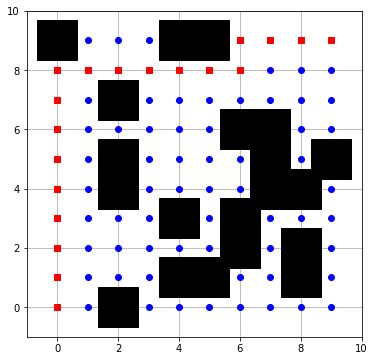

In [258]:
# dijkstra(Graph, start, target, #obstacle)
dijkstra(g, 0, 99, 20)